In [ ]:
from LSH_functions import * 
def load_data(file_path, encoding='utf-8'):
    """Load data from a CSV file into a pandas DataFrame."""

    return pd.read_csv(file_path,encoding=encoding )

In [ ]:
ACM = load_data('../data/DBLP-ACM/ACM.csv')
DBLP = load_data('../data/DBLP-ACM/DBLP2.csv',encoding='windows-1252')

print("ACM DataFrame:")
print(ACM.iloc[0])
print("\n")
print("DBLP DataFrame:")
print(DBLP.iloc[0])  

ACM DataFrame:
id                                                    304586
title      The WASA2 object-oriented workflow management ...
authors                      Gottfried Vossen, Mathias Weske
venue         International Conference on Management of Data
year                                                    1999
Name: 0, dtype: object


DBLP DataFrame:
id                                  journals/sigmod/Mackay99
title      Semantic Integration of Environmental Models f...
authors                                      D. Scott Mackay
venue                                          SIGMOD Record
year                                                    1999
Name: 0, dtype: object


In [ ]:

## Remove the 'id' column from both DataFrames
DBLP.drop(columns=['id'], inplace=True, errors='ignore')
ACM.drop(columns=['id'], inplace=True, errors='ignore')

### Concatenate the values in each record into one single string.


In [ ]:
ACM = ACM.apply(process_rows, axis=1)
DBLP = DBLP.apply(process_rows, axis=1)

### Combine the records from both tables into one big list as we did during the lab.


In [ ]:
records = ACM.tolist()
records.extend(DBLP.tolist())
print(f"Total number of records: {len(records)}")
print(records[0:5])

Total number of records: 4910
['the wasa2 object-oriented workflow management system gottfried vossen, mathias weske international conference on management of data 1999', 'a user-centered interface for querying distributed multimedia databases isabel f. cruz, kimberly m. james international conference on management of data 1999', 'world wide database-integrating the web, corba and databases athman bouguettaya, boualem benatallah, lily hendra, james beard, kevin smith, mourad quzzani international conference on management of data 1999', 'xml-based information mediation with mix chaitan baru, amarnath gupta, bertram lud&#228;scher, richard marciano, yannis papakonstantinou, pavel velikhov, vincent chu international conference on management of data 1999', 'the ccube constraint object-oriented database system alexander brodsky, victor e. segal, jia chen, paval a. exarkhopoulo international conference on management of data 1999']


### Use the functions in the tutorials from lab 5 to compute the shingles, the minhash signature and the similarity.


In [ ]:
k = 3
print(f"the number of records (documents):{len(records)}")
shingles = []
for record in records:
    shingles.append(shingle(record,k))
vocab = build_vocab(shingles)
print(f"Number of vocabulary is:{len(vocab)}")
shingles_1hot = []
for shingle_set in shingles:
    shingles_1hot.append(one_hot(shingle_set,vocab))
shingles_1hot = np.stack(shingles_1hot)
shingles_1hot.shape


the number of records (documents):4910
Number of vocabulary is:9238


(4910, 9238)

In [ ]:
minhash_arr =  get_minhash_arr(100,vocab)
signatures = []
for vector in shingles_1hot:
    signatures.append(get_signature(minhash_arr,vector))
signatures = np.stack(signatures)
signatures.shape
print("shape of signiture matrix:",signatures.shape,
       "shape of 1hot matrix:",shingles_1hot.shape,
       "the reduction is:",shingles_1hot.shape[1]/signatures.shape[1] )


shape of signiture matrix: (4910, 100) shape of 1hot matrix: (4910, 9238) the reduction is: 92.38


Note: The biggest value of this approach is that it significantly reduces the dimensionality of the data, 1hot has 9k columns while signiture matrix has 100 column


In [ ]:
# print("time comparison between jaccard and signiture similarity")

# %timeit jaccard_similarity(shingles[2],shingles[3])
# %timeit compute_signature_similarity(signatures[2],signatures[3])

100%|██████████| 500/500 [00:02<00:00, 239.12it/s]


count                                                            \
signiture      0.0       0.1      0.2     0.3    0.4   0.5   0.6   0.7   0.8   
jaccard                                                                        
0.0        59234.0   13618.0      4.0     0.0    0.0   0.0   0.0   0.0   0.0   
0.1        30196.0  117128.0  14118.0    16.0    0.0   0.0   0.0   0.0   0.0   
0.2           12.0    2112.0   9194.0  1532.0   24.0   0.0   0.0   0.0   0.0   
0.3            0.0       0.0    330.0  1430.0  284.0   0.0   0.0   0.0   0.0   
0.4            0.0       0.0      0.0    12.0   70.0  18.0   0.0   0.0   0.0   
0.5            0.0       0.0      0.0     0.0    0.0  14.0   4.0   0.0   0.0   
0.6            0.0       0.0      0.0     0.0    4.0   2.0  14.0   0.0   0.0   
0.7            0.0       0.0      0.0     0.0    0.0   0.0   4.0  10.0   4.0   
0.8            0.0       0.0      0.0     0.0    0.0   0.0   0.0   2.0  14.0   
0.9            0.0       0.0      0.0     0.0    0.0   0.0   0.0   0.0   2.0   
1.0            0.0       0.0      0.0     0.0    0.0   0.0   0.0   0.0   0.0   

                        
signiture   0.9    1.0  
jaccard                 
0.0         0.0    0.0  
0.1         0.0    0.0  
0.2         0.0    0.0  
0.3         0.0    0.0  
0.4         0.0    0.0  
0.5         0.0    0.0  
0.6         0.0    0.0  
0.7         0.0    0.0  
0.8         0.0    0.0  
0.9         6.0    0.0  
1.0        10.0  578.0

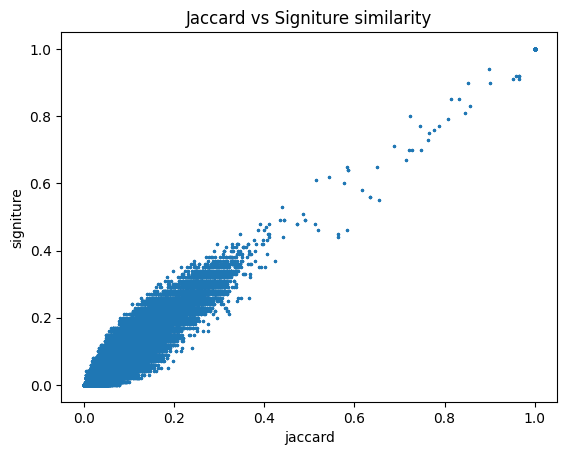

In [ ]:
## Side code to compute the similarity for n_sample pairs and plot them
import tqdm as tqdm
n = len(shingles)
n_sample = 500 
sampl = np.random.uniform(low=0, high=n, size=(n_sample,)).astype(int)
np.random
df = pd.DataFrame(columns=['jaccard','signiture'])
df_l = []
for shingle in tqdm.tqdm(sampl):
    for i in sampl:
        df_l.extend([{'jaccard': jaccard_similarity(shingles[i],shingles[shingle]), 
                    'signiture': compute_signature_similarity(signatures[i],signatures[shingle])}])
df = pd.DataFrame(df_l)
df.plot.scatter(x='jaccard',y='signiture',title="Jaccard vs Signiture similarity",s=2)
pd.DataFrame(df.round(1).value_counts()).reset_index().pivot(index='jaccard',columns='signiture').fillna(0)

In [ ]:
b = 10  # number of buckets
lsh = LSH(b)
for signature in signatures:
    lsh.add_hash(signature)
candidate_pairs = lsh.check_candidates()
len(candidate_pairs)


1448

In [ ]:
for candidate in list(candidate_pairs)[-5:
                                       ]:
    print("Candidate similar sentence are:")
    print(records[candidate[0]])
    print(records[candidate[1]])
    print("="*10)


Candidate similar sentence are:
architecture of oracle parallel server roger bamford, d. butler, boris klots, n. macnaughton very large data bases 1998
architecture of oracle parallel server d. butler, boris klots, roger bamford, n. macnaughton vldb 1998
Candidate similar sentence are:
book reviews karl aberer acm sigmod record 2002
book review column karl aberer acm sigmod record 2002
Candidate similar sentence are:
editor's notes ling liu sigmod record 2002
editor's notes ling liu sigmod record 2003
Candidate similar sentence are:
on completeness of historical relational query languages james clifford, albert croker, alexander tuzhilin acm transactions on database systems (tods) 1994
on completeness of historical relational query languages james clifford, albert croker, alexander tuzhilin acm trans. database syst. 1994
Candidate similar sentence are:
the database group at university of hagen gunter schlageter, thomas berkel, eberhard heuel, silke mittrach, andreas scherer, wolfgang w

In [ ]:
# ## example on how this works 

# signatures_examples = np.array([[1,2,3,4,5,6],
#                                 [1,2,3,4,5,7],
#                                 [10,20,30,40,50,60]])
# b = 3
# lsh_example = LSH(b)
# for index ,signatures_example in enumerate(signatures_examples):
#     print(index, " split into buckets > ", lsh_example.make_subvecs(signatures_example).tolist())

# print("-"*20)

# for signatures_example in signatures_examples:
#     lsh_example.add_hash(signatures_example)
# print(lsh_example.buckets)

# len(lsh_example.check_candidates())
